## Klinkenberg Effect

kg = kl + c*(1/Pm)

6.9kl^0.64 +pm*kl -pm*kg = 0

ki+1 = ki - f(ki)/f'(ki)

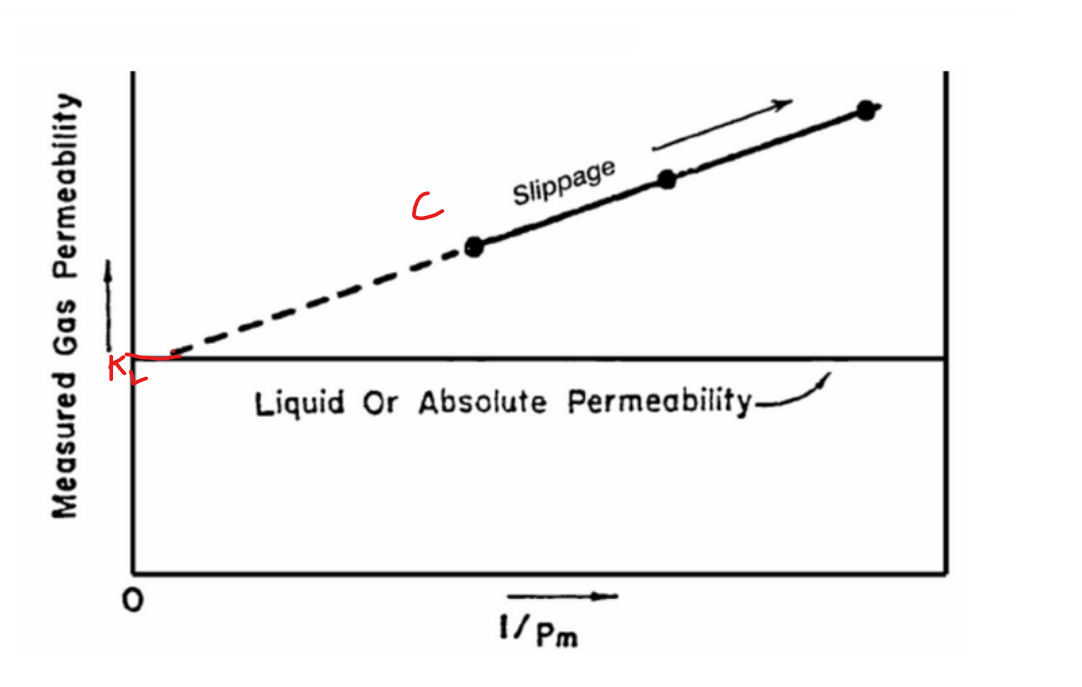

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
kg = float(input("Enter the measured permeability: "))
pm = float(input("Enter the mean pressure across the core: "))
k = float(input("Enter the initial guess of absolute permeability: "))


while (abs(6.9*k**0.64+pm*k - pm*kg)>0.0000000001):
    k = k - ((6.9*k**0.64+pm*k - pm*kg)/(4.416*(k**(-0.36))+pm))
    
print(f"The final value of Perm K is: {k} ")

print(f"The % Error is: {100*abs((k-23.66)/k)}")

Enter the measured permeability:  46.6
Enter the mean pressure across the core:  2.152
Enter the initial guess of absolute permeability:  85


The final value of Perm K is: 22.849002279470838 
The % Error is: 3.5493791396651915


In [3]:
# plt.plot(x,y)

In [4]:
x = [0,1/pm]
y = [k,kg]

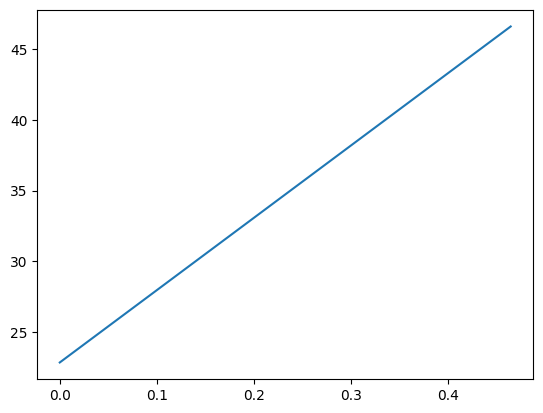

In [5]:
plt.plot(x,y)

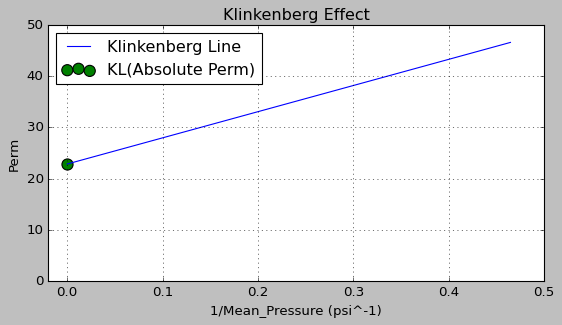

In [14]:
plt.style.use('classic')

plt.figure(figsize=(8,4))

plt.plot(x,y,label = "Klinkenberg Line")
plt.scatter(0,k,label="KL(Absolute Perm)",c="green",s=100)
plt.xlabel('1/Mean_Pressure (psi^-1)')
plt.xlim(-0.02,0.5)
plt.ylim(0,)
plt.ylabel('Perm')

plt.title('Klinkenberg Effect')
plt.legend(loc="best")
plt.grid(True)

In [17]:
def klinkenberg(kg,pm,k,pm_new):

    """
    This klinkenberg function calculates absolute permeability for given gas permeability at a given mean pressure.
    INPUTS:
    kg=> gas permeability in lab at a given mean pressure pm
    pm => mean pressure
    k=>User initial guess for absolute perm.

    pm_new = > New pressure on which gas permeability need to be calculated
    
    return:
    k=> value of absolute permeability
    plots the klinkenberg effect
    
    
    """

    count = 0
    while (abs(6.9*k**0.64+pm*k - pm*kg)>0.0000000001):
        k = k - ((6.9*k**0.64+pm*k - pm*kg)/(4.416*(k**(-0.36))+pm))
        count+=1
    
    print(f"The final value of Perm K is: {k} ")
    print(f"The number of iterations used = {count}")

    print(f"=====Plot=====")
    
    x=[0,1/pm]
    y=[k,kg]
    
    plt.style.use('classic')

    plt.figure(figsize=(8,4))

    plt.plot(x,y)

    plt.xlabel('1/Mean_Pressure (psi^-1)')
    
    plt.scatter(0,k,label="KL(Absolute Perm)",c="green",s=100)
    
    plt.scatter(1/pm,kg,label="User provided data",c="red",s=100)

    plt.ylabel('Perm')

    plt.xlim(-0.02,)
    plt.ylim(0,)

    plt.title('Klinkenberg Effect')
    
    plt.legend(loc="best")

    plt.grid(True)

    return k

    

    

The final value of Perm K is: 6.836502419396808 
The number of iterations used = 4
=====Plot=====


6.836502419396808

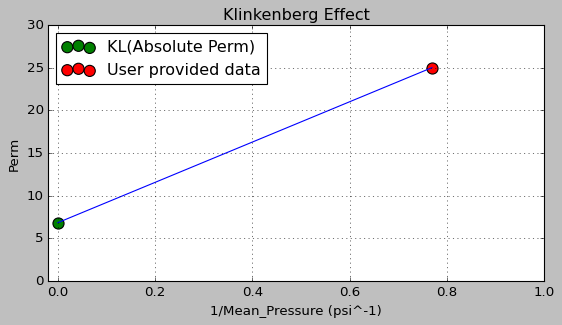

In [18]:
klinkenberg(25,1.3,20)

In [19]:
c = k

In [20]:
c

22.849002279470838

In [21]:
m = (kg-k)*pm

In [22]:
m

51.11214709457876

In [24]:
x_axis = np.linspace(0,1,500)

In [25]:
y_axis = m*x_axis+c

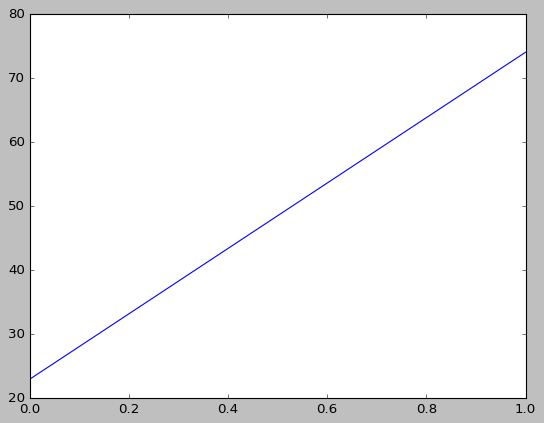

In [26]:
plt.plot(x_axis,y_axis)

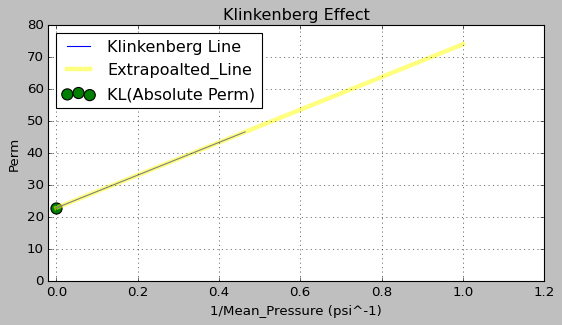

In [37]:
plt.style.use('classic')

plt.figure(figsize=(8,4))

plt.plot(x,y,label = "Klinkenberg Line")
plt.plot(x_axis,y_axis,label="Extrapoalted_Line",alpha=0.5,lw=4,c="yellow")
plt.scatter(0,k,label="KL(Absolute Perm)",c="green",s=100)
plt.xlabel('1/Mean_Pressure (psi^-1)')
plt.xlim(-0.02)
plt.ylim(0,)
plt.ylabel('Perm')

plt.title('Klinkenberg Effect')
plt.legend(loc="best")
plt.grid(True)

In [31]:
pm_new = 2

In [32]:
kg_new = m*(1/pm_new)+c 

In [33]:
kg_new 

48.40507582676022

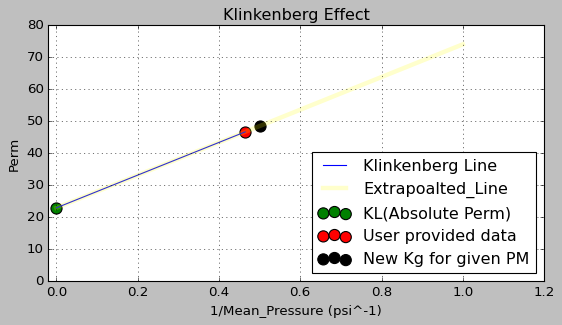

In [38]:
plt.style.use('classic')

plt.figure(figsize=(8,4))

plt.plot(x,y,label = "Klinkenberg Line")
plt.plot(x_axis,y_axis,label="Extrapoalted_Line",alpha=0.2,lw=4,c="yellow")
plt.scatter(0,k,label="KL(Absolute Perm)",c="green",s=100)
plt.scatter(1/pm,kg,label="User provided data",c="red",s=100)

plt.scatter(1/pm_new,kg_new,label="New Kg for given PM",c="black",s=100)

plt.xlabel('1/Mean_Pressure (psi^-1)')
plt.xlim(-0.02)
plt.ylim(0,)
plt.ylabel('Perm')

plt.title('Klinkenberg Effect')
plt.legend(loc="best")
plt.grid(True)

## Reservoir Pressure profile

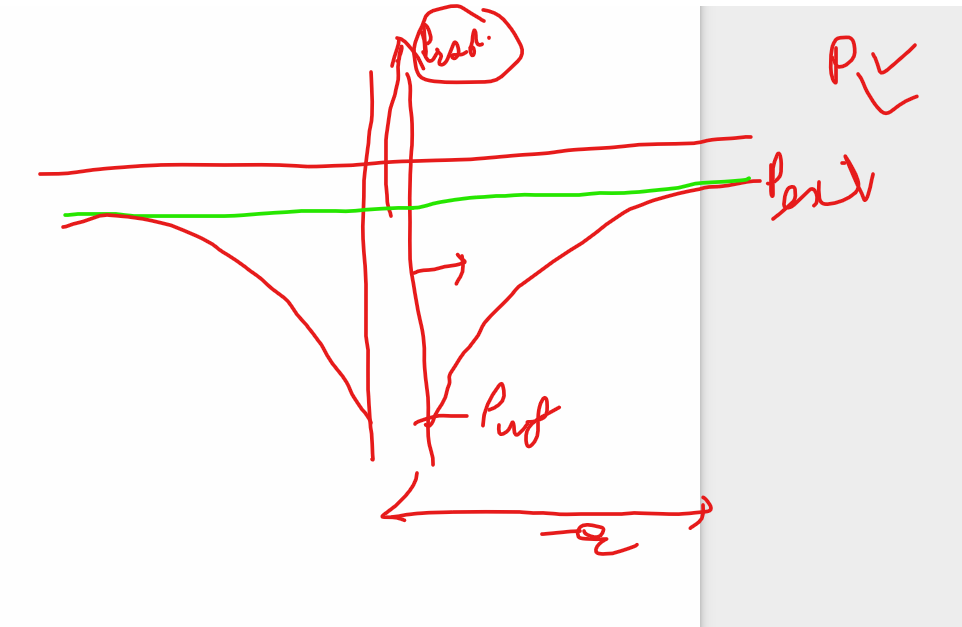

## Pr = Pwf +(141.2*q*mu*B*(log(r/rw))/(k*h))

In [39]:
re = float(input('Outer radius of Reservoir(ft): '))
rw = float(input('Wellbore Radius(ft): '))
Pwf = float(input('Bottomhole Pressure(PSI): '))
h = float(input('Net Pay Thickness(ft): '))
k = float(input('Average Reservoir Permeability(mD): '))
q = float(input('Flowrate(STB/Day): '))
mu = float(input('Oil Viscosity: '))
B = 1

Outer radius of Reservoir(ft):  1800
Wellbore Radius(ft):  0.5
Bottomhole Pressure(PSI):  1500
Net Pay Thickness(ft):  60
Average Reservoir Permeability(mD):  150
Flowrate(STB/Day):  200
Oil Viscosity:  15


In [40]:
r = np.linspace(rw,re,500)

In [41]:
Pressure = Pwf+(141.2*q*mu*B*(np.log(r/rw))/(k*h))

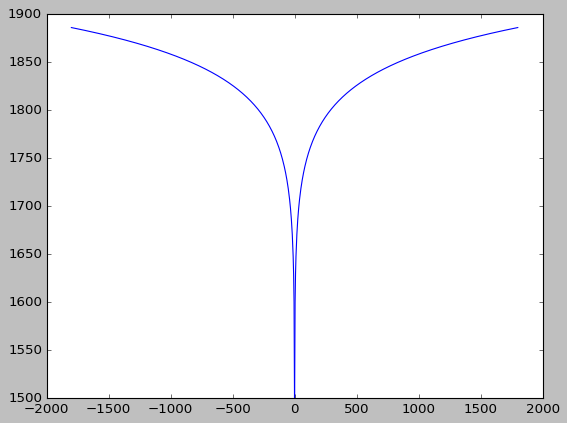

In [46]:
plt.plot(r,Pressure,color="blue")
plt.plot(-r,Pressure,color="blue")

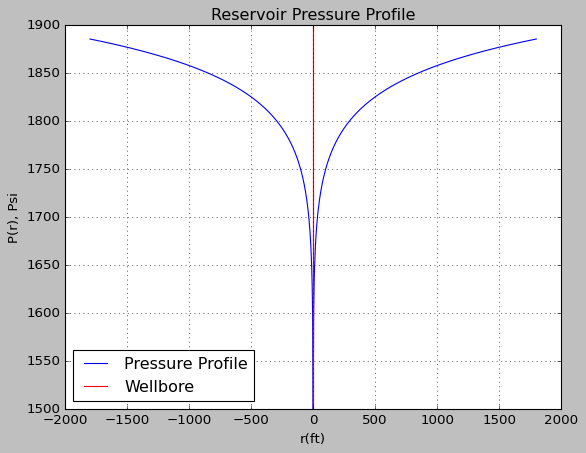

In [54]:
plt.figure(figsize = [8,6])
plt.plot(r,Pressure,color="blue",label = "Pressure Profile")
plt.plot(-r,Pressure,color="blue")
plt.axvline(rw,color = "red",label = "Wellbore")
plt.axvline(-rw,color = "red",)

plt.xlabel('r(ft)')
plt.ylabel('P(r), Psi')
plt.title('Reservoir Pressure Profile')
plt.legend(loc="best")
plt.grid(True)

In [58]:
def pressureprof():
    re = float(input('Outer radius of Reservoir(ft): '))
    rw = float(input('Wellbore Radius(ft): '))
    Pwf = float(input('Bottomhole Pressure(PSI): '))
    h = float(input('Net Pay Thickness(ft): '))
    k = float(input('Average Reservoir Permeability(mD): '))
    q = float(input('Flowrate(STB/Day): '))
    mu = float(input('Oil Viscosity: '))
    B = 1

    print("======Plot======")

    plt.figure(figsize = [8,6])
    plt.plot(r,Pressure,color="blue",label = "Pressure Profile")
    plt.plot(-r,Pressure,color="blue")
    plt.axvline(rw,color = "red",label = "Wellbore")
    plt.axvline(-rw,color = "red",)
    plt.ylim(0,)
    
    plt.xlabel('r(ft)')
    plt.ylabel('P(r), Psi')
    plt.title('Reservoir Pressure Profile')
    plt.legend(loc="best")
    plt.grid(True)
        

Outer radius of Reservoir(ft):  200
Wellbore Radius(ft):  2
Bottomhole Pressure(PSI):  200
Net Pay Thickness(ft):  20
Average Reservoir Permeability(mD):  20
Flowrate(STB/Day):  200
Oil Viscosity:  2


======Plot======


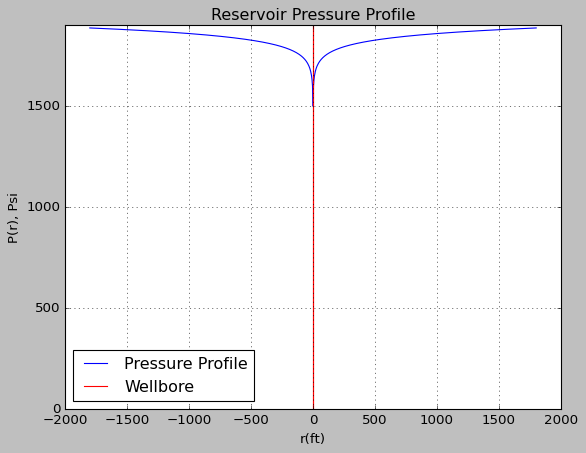

In [59]:
pressureprof()

## Dynamic Plotting

- Visualization of effect of Viscosity, flowrate and permeability on pressure profile

In [60]:
from ipywidgets import interactive
from IPython.display import display

In [74]:
def flowprofile(k,mu,q):

    re = 3000
    rw = 0.5
    Pe = 4000
    h = 60
    B =1

    r = np.linspace(rw,re,500)
    pressure = Pe - (141.2*q*mu*B*(np.log(re/r))/(k*h))

    y_min = pressure[np.where(r==rw)]
    plt.figure(figsize=(8,6))
    plt.plot(r,pressure,lw = 4,color= "blue")
    plt.plot(-r,pressure,lw = 4,color = "blue")

    plt.axvline(rw,color="yellow")
    plt.axvline(-rw,color="yellow")

    plt.axhline(y_min,lw =3, color = "red")

    plt.ylim(0,5000)

    plt.xlabel('r(ft)')
    plt.ylabel('P(r), PSI')
    
    plt.title("Reservoir Pressure Profile")
    plt.grid(True)

    return r, pressure
    

In [75]:
interactive_flow_profile = interactive(flowprofile,k = (20,1000),mu = (5,15),q = (100,2000))

In [76]:
display(interactive_flow_profile)

interactive(children=(IntSlider(value=510, description='k', max=1000, min=20), IntSlider(value=10, description…

In [ ]:
## streamlit